In [3]:
import pandas as pd
import random
import sqlite3
from scipy.stats import norm
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from bayes_ab.experiments import BinaryDataTest
import numpy as np
import statsmodels.formula.api as smf # статистическая библиотека для анализа причинно-следственных связей

import warnings 
warnings.filterwarnings('ignore') 

### Задание 1. Успешность прототипа

Известно что компания конкурент выпустила 1000 прототипов игр, из которых было 5 успешных. Наша компания выпустила 200 прототипов из которых ни один не был успешен.
Какова вероятность что следующий (201й) наш прототип будет успешен? Решите задачу классическим и баесовским подходами.

#### Решение 1.

Так как наша компания уже выпустила 200 прототипов игры из которых ни один не был успешен, то мы можем говорить об этом факте как о состоявшемся эксперименте.  
Т.е. воспользуемся формулой экспериментальной вероятности:  
<center> P(A) = Количество раз, когда событие происходит в эксперименте / Общее количество испытаний </center>

In [4]:
print("Вероятность успешности 201-го прототипа игры в нашей компании (классичесический подход / экспериментальная вероятность) равна:", 0/200)

Вероятность успешности 201-го прототипа игры в нашей компании (классичесический подход / экспериментальная вероятность) равна: 0.0


Применим байесовский подход. Формула Байеса в общем виде: $$ P(A|B)= {P(B|A)*P(A) \over P(B)}, $$
Выдвигаем гипотезу, что запуск 201-го прототипа игры в нашей компании будет успешным. И введем следующие обозначения:  
P(К1|У) - вероятность, что в компании конкурента запуск игры произойдет успешно,  
P(К1|Н) - вероятность, что в компании конкурента запуск игры произойдет неуспешно,  
P(К2|У) - вероятность, что в нашей компании запуск игры произойдет успешно (гипотеза),  
P(К2|Н) - вероятность, что в нашей компании запуск игры произойдет неуспешно,   
P(У|K1) = 5/1000 - вероятность успешного запуска игры в компании конкурента,  
P(У|K2) = 1/201 - вероятность успешного запуска игры в нашей компании,  
P(K1) = 1000/(1000+201)- вероятность, что прототип игры из компании конкурента,  
P(K2) = 201/(1000+201) - вероятность, что прототип игры из нашей компании,  
P(У) = (5+1)/1201 - вероятность, что прототип игры будет успешен,
P(Н) = (995+200)/1201 - вероятность, что прототип игры будет неуспешен.
Тогда формула Байеса для нашей задачи примет вид: $$ P(К2|У) = {P(У|К2)*P(K2) \over P(У)} $$

Применим байесовский подход. Формула Байеса в общем виде: $$ P(A|B)= {P(B|A)*P(A) \over P(B)}, $$
Выдвигаем гипотезу, что запуск 201-го прототипа игры в нашей компании будет успешным. И введем следующие обозначения:  
P(К1|У) = 5/1000- вероятность, что в компании конкурента запуск игры произойдет успешно,  
P(К1|Н) = 995/1000 - вероятность, что в компании конкурента запуск игры произойдет неуспешно,  
P(К2|У) = 1/201- вероятность, что в нашей компании запуск игры произойдет успешно,  
P(К2|Н) = 200/201 - вероятность, что в нашей компании запуск игры произойдет неуспешно,   
P(У|K1) - вероятность что успешно запущенный прототип игры будет из компании конкурента,  
P(У|K2) - вероятность что успешно запущенный прототип игры будет из нашей компании,  
P(K1) = 1000/(1000+201)- вероятность, что прототип игры из компании конкурента,  
P(K2) = 201/(1000+201) - вероятность, что прототип игры из нашей компании,  
P(У) = (5+1)/1201 - вероятность, что прототип игры будет успешен,
P(Н) = (995+200)/1201 - вероятность, что прототип игры будет неуспешен.
Тогда формула Байеса для нашей задачи примет вид: $$ P(У|К2) = {P(К2|У)*P(У) \over P(К2)} $$

In [29]:
probability_Y_K2 = 1/201 * 6/1201 / (201/1201)
print("Вероятность, что успешно запушенный прототип игры будет из нашей компании равна:", round(probability_K2_Y*100,3), "%")

Вероятность что успешно запушенный прототип игры будет из нашей компании (по формуле Байеса) равна: 0.015 %


In [5]:
probability_K2_Y = 1/201 * 201/1201 / (6/1201)
print("Вероятность успешности 201-го прототипа игры в нашей компании (по формуле Байеса) равна:", round(probability_K2_Y*100,3), "%")

Вероятность успешности 201-го прототипа игры в нашей компании (по формуле Байеса) равна: 16.667 %


### Задание 2. Сравнение групп платящих игроков

В мобильной игре около 10% игроков совершает платежи в первый месяц с момента установки игры (база расчета - 500 игроков).  
Геймдизайнеры разработали обновление которое по их экспертной оценке должно увеличить процент плательщиков с 10% до 11%. Цель эксперимента - подтвердить или опровергнуть их гипотезу.
Опишите оптимальный по вашему мнению дизайн эксперимента.
Рассчитайте длительность эксперимента при условии что каждый день в игру приходит около 100 новых игроков.
Самостоятельно сгенерируйте датасет с около 10% плательщиков (контроль) и рассчитайте 95% HDI / CI.
Сгенерируйте несколько вариантов экспериментальной группы (хуже, лучше, без эффекта), рассчитайте силу эффекта, HDI / CI и ваши выводы для каждого варианта.
Решите задачу 2 разными подходами: frequentist / bayesian

Необходимо все ответы сопроводить комментариями почему вы выбрали ту или иную методику расчета, алгоритм и т.д.

#### Решение 2.

В данной задаче нам необходимо сравнить текущую версию игры - А и обновленную - В. Для проведения эксперимента подходит метод, который называется А/В-тестирование.

Дизайн эксперимента:
1. ВЫДВИЖЕНИЕ ГИПОТЕЗЫ И ОПРЕДЕЛЕНИЕ МЕТРИКИ 
2. ПОДГОТОВКА К ТЕСТИРОВАНИЮ  
 2.1. Определение размера выборки и длительности теста  
 2.2. Принятие решения о целесообразности проведения тестирования: производится оценка ресурсов и затрат на проведение эксперимента  
 2.3. Разработка обновления игры
3. НАСТРОЙКА РАСПРЕДЕЛЕНИЯ НА ГРУППЫ. Группы должны быть равнозначны, т.е. максимально схожи по всем возможным признакам
4. ПРОВЕДЕНИЕ ЭКСПЕРИМЕНТА И ПРОВЕРКА ЕГО КОРРЕКТНОСТИ
5. СБОР РЕЗУЛЬТАТОВ
6. АНАЛИЗ РЕЗУЛЬТАТОВ. Производится сравнение метрик в двух группах на основе собранных данных.
7. ФОРМИРОВАНИЕ ВЫВОДОВ И ПРИНЯТИЕ РЕШЕНИЯ

**Выдвигаем гипотезу:** обновление увеличит до 11% количество плательщиков среди новых игроков в первый месяц с момента установки игры.  
**Определяем метрику:** процент игроков, совершивших платеж в первый месяц с момента установки игры.  

**Подготовка к тестированию**  
Воспользуемся онлайн-калькулятором Эвана Миллера (https://www.evanmiller.org/ab-testing/sample-size.html), чтобы определить размер выборки.  
Базовый коэффициент конверсии: 10%  
Минимальный обнаруживаемый эффект: 1% (абсолютный) или 10% (относительный)  
Статистическая мощность: 95%  
Уровень значимости: 5%  
**Получаем размер выборки: 23856**

Для получения длительности эксперимента так же можно воспользоваться онлайн-калькулятором или простой формулой:  
выборка / трафик = количество дней  
23856/100 = 238.56  
**Получаем длительность эксперимента: 239 дней**

**Настройка распределения на группы**  
Сгенерируем несколько датасетов:  
data_a - датасет контрольной группы, с конверсией игроков 10%  
data_b - датасет группы, в которой конверсия лучше, чем в контрольной и составляет 11%,  
data_с - датасет группы, в которой конверсия хуже, чем в контрольной, и равна 8%,  
data_d - датасет группы, в которой конверсия такая же, как в контрольной.  
Под **конверсией** понимаем долю игроков, выполнивших целевое действие - совершивших платеж в перый месяц с момента установки игры.

**Сгенерируем датасеты**

In [6]:
N = 23856 # размер выборки
conv_percent_a = 10 # конверсия в контрольной группе a (%)
conv_percent_b = 11 # конверсия в группе b (%)
conv_percent_c = 8 # конверсия в группе c (%)
conv_percent_d = 10 # конверсия в группе d (%)

In [7]:
# Сгенерируем номера пользователей, у которых целевую переменну (конверсию) приравняем к 1 - пользователь совершил платеж. 
# Эти номера не должны повторяться
index_a, index_b, index_c, index_d = set(), set(), set(), set()
len_a = int(N*conv_percent_a/100)
len_b = int(N*conv_percent_b/100)
len_c = int(N*conv_percent_c/100)
len_d = int(N*conv_percent_d/100)

while len(index_a)<len_a:
    index_a.add( random.randint(0, N-1) )
while len(index_b)<len_b:
    index_b.add( random.randint(0, N-1) )
while len(index_c)<len_c:
    index_c.add( random.randint(0, N-1) )
while len(index_d)<len_d:
    index_d.add( random.randint(0, N-1) )   

In [8]:
# Сгенерируем датасеты
count_games = [0 for i in range(0,N)]
# Инициализируем целевую переменную 'conversion' нулями
data_a, data_b, data_c, data_d = pd.DataFrame({'conversion': count_games}), pd.DataFrame({'conversion': count_games}), pd.DataFrame({'conversion': count_games}), pd.DataFrame({'conversion': count_games})

for i in index_a:    
    data_a.iloc[i]['conversion']=1 # присваиваем 1, т.е. пользователь совершил платеж в первый месяц
for i in index_b:    
    data_b.iloc[i]['conversion']=1
for i in index_c:    
    data_c.iloc[i]['conversion']=1
for i in index_d:    
    data_d.iloc[i]['conversion']=1

'''print(data_a['conversion'].value_counts())
print(data_b['conversion'].value_counts())
print(data_c['conversion'].value_counts())
print(data_d['conversion'].value_counts())'''

"print(data_a['conversion'].value_counts())\nprint(data_b['conversion'].value_counts())\nprint(data_c['conversion'].value_counts())\nprint(data_d['conversion'].value_counts())"

Доверительные интервалы - один из статистических методов

In [9]:
# Рассчитаем доверительные интервалы для сгенерированных датасетов
def conf_interval(n, x_p, gamma=0.95):   # gamma - заданный уровень надёжности (доверия)    
    alpha = 1 - gamma # уровень значимости / вероятность допустить ошибку первого рода
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 # погрешность
    lower_bound = x_p - eps # левая граница
    upper_bound = x_p + eps # правая граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound * 100, 2), round(upper_bound * 100, 2)

In [10]:
conf_interval_a = conf_interval(
n = data_a['conversion'].count(), # размер выборки
x_p = data_a['conversion'].mean() # выборочная пропорция
)
conf_interval_b = conf_interval(
n = data_b['conversion'].count(), # размер выборки
x_p = data_b['conversion'].mean() # выборочная пропорция
)
conf_interval_c = conf_interval(
n = data_c['conversion'].count(), # размер выборки
x_p = data_c['conversion'].mean() # выборочная пропорция
)
conf_interval_d = conf_interval(
n = data_d['conversion'].count(), # размер выборки
x_p = data_d['conversion'].mean() # выборочная пропорция
)

print('Доверительный интервал для конверсии группы А: {}'.format(conf_interval_a))
print('Доверительный интервал для конверсии группы B: {}'.format(conf_interval_b))
print('Доверительный интервал для конверсии группы C: {}'.format(conf_interval_c))
print('Доверительный интервал для конверсии группы D: {}'.format(conf_interval_d))

Доверительный интервал для конверсии группы А: (9.62, 10.38)
Доверительный интервал для конверсии группы B: (10.6, 11.4)
Доверительный интервал для конверсии группы C: (7.65, 8.34)
Доверительный интервал для конверсии группы D: (9.62, 10.38)


Итак, можно сделать вывод, что с надёжностью в 95% конверсия контрольной группы А лежит в интервале от 9.62% до 10.38%, а конверсия группы B - в интервале от 10.6% до 11.4%. Мы видим, что эти интервалы пересекаются, это значит, что конверсии в обеих группах могут совпасть. Т.е. мы не можем однозначно сказать, если разница в конверсиях этих групп. Поэтому построим доверительный интервал для разницы конверсий.

In [11]:
def diff_conf_interval(n, xp, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    diff = xp[1] - xp[0] # выборочная разница конверсий групп B и A
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (xp[0] * (1 - xp[0])/n[0] + xp[1] * (1 - xp[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая (нижняя) граница
    upper_bound = diff + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound *100, 2), round(upper_bound * 100, 2)

In [12]:
# строим доверительный интервал для разности конверсий
diff_interval_ab = diff_conf_interval(
n = [data_a['conversion'].count(), data_b['conversion'].count()], # размеры выборок групп А и B
xp = [data_a['conversion'].mean(), data_b['conversion'].mean()] # выборочная пропорция групп A и B
)
diff_interval_ac = diff_conf_interval(
n = [data_a['conversion'].count(), data_c['conversion'].count()], 
xp = [data_a['conversion'].mean(), data_c['conversion'].mean()] 
)
diff_interval_ad = diff_conf_interval(
n = [data_a['conversion'].count(), data_d['conversion'].count()], 
xp = [data_a['conversion'].mean(), data_d['conversion'].mean()] 
)

print('Доверительный интервал для разности конверсий групп А и В: {}'.format(diff_interval_ab))
print('Доверительный интервал для разности конверсий групп А и C: {}'.format(diff_interval_ac))
print('Доверительный интервал для разности конверсий групп А и D: {}'.format(diff_interval_ad))

Доверительный интервал для разности конверсий групп А и В: (0.45, 1.55)
Доверительный интервал для разности конверсий групп А и C: (-2.51, -1.49)
Доверительный интервал для разности конверсий групп А и D: (-0.54, 0.54)


Обе границы доверительного интервала для разности конверсий А и В являются положительными, это значит, что вариант B более эффективен по метрике конверсии, чем вариант А с надёжностью 95%.  
Границы доверительного интервала для разности конверсий А и С являются отрицательными, это значит, что вариант C хуже по метрике конверсии, чем вариант А с надёжностью 95%.  
Границы доверительного интервала для разности конверсий А и D охватывают точку 0, это значит, что варианты А и D равнозначны по метрике конверсии.

Целевой признак "conversion" — это случайная величина, имеющая распределение Бернулли. Поэтому, для подтверждения или опровержения выдвинутых гипотез и сравнения конверсии в двух независимых группах мы можем воспользоваться таким статистическим методом как U-критерий Манна — Уитни (используется для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно).

In [13]:
# Сформулируем нулевую гипотезу (она должна содержать утверждение об отсутствии эффекта):
H0 = 'Обновление уменьшит или не изменит процент плательщиков ' # pa >= pb - конверсия в группе a болльше или равна конверсии в группе b

# Сформулируем альтернативную гипотезу (утверждение о наличии эффекта)
H1 = 'Обновление увеличит процент плательщиков в первый месяц' # pa < pb -это правосторонняя гипотеза

alpha = 0.05 # уровень значимости

stat, p = mannwhitneyu(data_a, data_b, alternative='less') # alternative — вид альтернативной гипотезы
print(stat, p)
# интерпретируем результат:
if p > alpha: # нельзя отвергать нулевую гипотезу
	print(H0) 
else:
	print(H1)

[2.81703576e+08] [0.00017886]
Обновление увеличит процент плательщиков в первый месяц


In [14]:
H0 = 'Обновление не изменит или увеличит процент плательщиков' # pa <= pc
H1 = 'Обновление уменьшит процент плательщиков' # pa > pc - это левосторонняя гипотеза

alpha = 0.05 # уровень значимости

stat, p = mannwhitneyu(data_a, data_c, alternative='greater')
print(stat, p)

if p > alpha:
	print(H0)
else:
	print(H1)

[2.90244024e+08] [1.16061013e-14]
Обновление уменьшит процент плательщиков


In [15]:
H0 = 'Обновление не изменит процент плательщиков' # pa!=pd
H1 = 'Обновление изменит процент плательщиков' # pa < pd или pa > pd  - это двусторонняя гипотеза

alpha = 0.05 # уровень значимости

stat, p = mannwhitneyu(data_a, data_d)
print(stat, p)

if p > alpha:
	print(H0)
else:
	print(H1)

[2.84554368e+08] [1.]
Обновление не изменит процент плательщиков


Применим байесовский подход в нашем эксперименте.

In [16]:
test = BinaryDataTest() # класс для байесовского A / B тестирования двоичных данных

# добавляем данные для анализа 
test.add_variant_data("A", data_a['conversion'])
test.add_variant_data("B", data_b['conversion'])
test.add_variant_data("C", data_c['conversion'])
test.add_variant_data("D", data_d['conversion'])

# evaluate test:
test.evaluate(seed=314)
data = test.data

+---------+--------+-----------+-------------+----------------+--------------------+---------------+----------------+------------------+
| Variant | Totals | Positives | Sample rate | Posterior rate | Chance to beat all | Expected loss | Uplift vs. "A" |     95% HDI      |
+---------+--------+-----------+-------------+----------------+--------------------+---------------+----------------+------------------+
|    B    | 23856  |    2624   |    11.00%   |     11.00%     |       99.97%       |     0.00%     |     10.02%     | [10.61%, 11.40%] |
|    D    | 23856  |    2385   |    10.00%   |     10.00%     |       0.02%        |     1.00%     |     0.00%      | [9.62%, 10.38%]  |
|    A    | 23856  |    2385   |    10.00%   |     10.00%     |       0.01%        |     1.00%     |     0.00%      | [9.62%, 10.38%]  |
|    C    | 23856  |    1908   |    8.00%    |     8.00%      |       0.00%        |     3.00%     |    -19.99%     |  [7.66%, 8.35%]  |
+---------+--------+-----------+---------

Метрики полученные при использовании байесовского метода коррелируют с метриками статистического подхода.

### Задание 3. Предсказание оттока

В мобильной игре, после установки и запуска игры начинается туториал - игрок проходит обучение игре, которое состоит из нескольких последовательных шагов. 
Данные представляют собой набор строк - уникальный id игрока, datetime и номер шага туториала который пройден игроком.
Геймдизайнеры выдвинули гипотезу - если мы с высокой вероятностью сможем предсказать шаг на котором игрок уйдет из игры заранее, то запустив альтернативное продолжение туториала с этого шага мы избежим оттока и увеличим прохождение туториала.
1.	Как бы вы решали задачу предсказания отвала игрока?
2.	Как оценить качество полученной модели? Опишите методы которые знаете и какой считаете оптимальным и почему.
3.	Предположим что вы разработали модель которая с достаточной вероятностью предсказывает отвал. Опишите дизайн эксперимента и методологию по проверке гипотезы геймдизайнеров

Решение 3.  

3.1. Задачу отвала игрока можно было бы решать как задачу классификации, где целевой переменной бал бы признак отвала (0 - игок прошел весь туториал и остался в игре / 1 - игрок ушел из игры).  
Однако, нам необходимо предсказать шаг на котором игрок уйдет из игры, т.е. число. Поэтому данную задачу нужно решать методом линейной или полиномиальной регрессии.  

3.2. Выберем линейную регрессию для решения задачи, тогда качество постоенной модели будем оценивать по следующим метрикам:  
MAE - средняя абсолютная ошибка между истинными значениями и предсказанными. Показывает насколько в среднем наша модель ошибается. Чем меньше значение метрики, тем лучше.  
MAPE - средняя абсолютная ошибка в процентах.
MSE - средняя квадратическая ошибка. Вычисление данной ошибки похоже на предыдущее. Разница в том, что вместо модуля разности между предсказанным и реальным значениями берём квадрат этого модуля.  
RMSE - Корень из средней квадратической ошибки (надо извлечь квадратный корень из MSE). Корень извлекается для того, чтобы привести размерности ответов и ошибок в соответствие и сделать метрику более понятной.  
$ R^2 $ -коэффициент детерминации. Описывает, какую долю информации о зависимости (дисперсии) смогла уловить модель.

3.2. Дизайн эксперимента по проверке гипотезы геймдизайнеров.  
* Анализ требований: возможно ли построение ML-модели предсказывающей шаг туториала на котором произойдет отвал игрока.
* Исследование и подготовка данных: необходимо подготовить обучающую выборку для использования в моделировании (обработать пропуски, закодировать текстовые категориальные признаки и т.д.)
* Моделирование и ценка модели. Разделение данных на обучающую и тестовую выборки, построение одной или нескольких моделей, решающих поставленную задачу, оценка их качества и выбор наилучшей.
* Принятие решения о выводе модели в продакшен.

### Задание 4. Эффективность рекламных кампаний

Отдел маркетинга оперирует некоторым множеством рекламных кампаний. Первая часть оперирования состоит из запуска тестовых рекламных кампаний, у которых есть требования по KPI при достижении которых тест считается успешным.
Успешные тесты переходят в разряд постоянных кампаний и вторая часть оперирования состоит из мониторинга постоянных кампаний - управление бюджетом кампании (COST) и мониторинг ее доходов (REVENUE), а так же соотношением доходов к расходам.
Главный KPI для постоянных рекламных кампаний - ROAS на 60й день, т.е. какой процент от расходов кампания возвращает на 60й день.
Для выполнения задачи необходимо использовать тестовый датасет (2 таблицы по расходам и доходам).
1.	Отдел маркетинга руководствуется гипотезой - чем больший COST расходуется на кампанию тем ниже ROAS 60го дня (рост CPI при увеличении объёма закупки при сохранении того же LTV 60го дня). На основании данных подтвердите или опровергните эту гипотезу. Исходите из того что мы точно знаем что CPI зависит от объема нелинейно, вопрос в том как эту зависимость описать и учесть во 2м вопросе.
2.	По каждой рекламной кампании рассчитайте суточный рекламный бюджет который максимизирует абсолютную маркетинговую прибыль рекламной кампании (REVENUE 60 дня минус COST).
3.	Исходя из пункта 2 по каждой рекламной кампании дайте ваше заключение о том насколько нужно увеличить / уменьшить ее суточный бюджет либо вообще остановить.
4.	Решите проблему рекламных кампаний по которым еще нет полных 60 дней. Объясните почему ваше решение оптимально

In [17]:
# Создаем подключение к базе данных
connection = sqlite3.connect('./testcase.db/testcase.db') 
cursor = connection.cursor()

cursor.execute("SELECT ALL Name FROM sqlite_master")
table_names = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", connection)
tables = {name: pd.read_sql_query(f"SELECT * FROM {name}", connection) for name in table_names['name']}
# Выводим имена таблиц
for name, table in tables.items():
    display(f"Таблица: {name}")
connection.close()

'Таблица: source_comparison'

'Таблица: costs'

'Таблица: revenue'

In [18]:
# считываем таблицы в датафреймы
connection = sqlite3.connect('./testcase.db/testcase.db') 
query = f'''SELECT * from costs'''
df_cost = pd.read_sql_query(query, connection) 
query = f'''SELECT * from revenue'''
df_revenue = pd.read_sql_query(query, connection)
connection.close()

display(df_cost)
display(df_revenue)

,Install_Dates,campaign_id,Country,installs,spends
0,2020-04-14,90570,CZ,35.0,19.79
1,2020-04-28,90619,AT,5.0,4.99
2,2020-05-10,794235,PK,79.0,0.40
3,2020-05-07,91872,FR,12.0,9.56
4,2020-04-03,19115,JP,6.0,3.39
...,...,...,...,...,...
9929,2020-04-02,90464,UN,0.0,0.45
9930,2020-04-27,19115,DE,27.0,21.33
9931,2020-03-27,159253,DK,2.0,0.19
9932,2020-04-12,790034,RU,534.0,81.06


,Install_Dates,campaign_id,Country,1d_LTV,3d_LTV,7d_LTV,14d_LTV,30d_LTV,60d_LTV
0,2020-04-14,90570,CZ,7.721194,8.104811,10.209480,11.845200,15.349594,15.768420
1,2020-03-30,90262,CA,1.424363,1.724738,1.724738,1.724738,1.724738,1.999413
2,2020-04-02,19115,PL,26.912006,32.943050,66.787497,70.071922,71.644023,72.057026
3,2020-04-15,788948,MD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2020-03-26,158583,DE,0.349793,0.349793,0.349793,0.349793,0.349793,0.349793
...,...,...,...,...,...,...,...,...,...
9929,2020-04-22,92551,IE,0.183268,0.183268,0.183268,0.183268,0.196383,-1.000000
9930,2020-04-03,788583,KR,12.366140,14.587743,20.081739,23.717408,26.927875,29.190742
9931,2020-04-12,790034,RU,47.323662,56.483875,65.396237,75.178386,85.603100,92.690140
9932,2020-03-22,791401,UA,2.711399,3.055914,3.910143,4.864455,5.487827,5.595752


### Задание 5. Связь рекламного трафика и органического

Приток новых игроков делится на 2 основных источника - рекламный и органический. Отдел маркетинг выдвигает гипотезу о связи рекламного и органического трафика: когда маркетологи привлекают больше рекламного трафика, растет и органический.
Для выполнения задачи необходимо использовать тестовый датасет (таблица source_comparison).
1.	Используя Causal Impact Analysis подтвердите или опровергните гипотезу маркетологов. Если вы ее опровергаете, то сформулируйте гипотезу которая кажется вам наиболее вероятной и проверьте ее
2.	Количественно рассчитайте вероятность что гипотеза маркетологов (или ваша) верна

Решение 5.

Выдвигаем причинно следственную гипотезу: увеличение рекламного трафика влечет за собой увеличение органического трафика.

In [19]:
connection = sqlite3.connect('./testcase.db/testcase.db') 

query = f'''SELECT * from source_comparison'''
df = pd.read_sql_query(query, connection) # считываем таблицу в датафрейм
connection.close()

display(df.head())
display(df.info())

,Install_Dates,source_type,Country,installs
0,2020-05-18,Paid,PY,4.0
1,2020-04-14,Paid,FR,35.0
2,2020-04-30,Paid,JP,25.0
3,2020-03-20,Paid,DE,11.0
4,2020-04-30,Paid,IT,8.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18606 entries, 0 to 18605
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Install_Dates  18606 non-null  object 
 1   source_type    18606 non-null  object 
 2   Country        18606 non-null  object 
 3   installs       18606 non-null  float64
dtypes: float64(1), object(3)
memory usage: 581.6+ KB


None

In [20]:
# Разделим датафрейм на два, для удобства дальнейших преобразований
df_paid = df[df['source_type'] == 'Paid']
df_organic = df[df['source_type'] == 'Organic']

df_paid = df_paid.drop_duplicates() # удалим дублирующиеся записи
df_paid = df_paid.drop_duplicates() # удалим дублирующиеся записи

display(df_paid.head(), df_paid.shape[0])
display(df_organic.head(), df_organic.shape[0])

,Install_Dates,source_type,Country,installs
0,2020-05-18,Paid,PY,4.0
1,2020-04-14,Paid,FR,35.0
2,2020-04-30,Paid,JP,25.0
3,2020-03-20,Paid,DE,11.0
4,2020-04-30,Paid,IT,8.0


10255

,Install_Dates,source_type,Country,installs
7,2020-03-21,Organic,EG,24.0
11,2020-04-25,Organic,CZ,19.0
15,2020-03-18,Organic,ID,248.0
19,2020-05-10,Organic,IE,1.0
30,2020-04-11,Organic,TZ,2.0


7684

Сгруппируем данные по дате и типу трафика. Применим агрегатную функцию суммы к столбцу "instals" - количество установок игры, чтобы получить суммарное количество трафика (рекламного и органического) за один день из разных стран.

In [21]:
df_paid.rename(columns={"installs": "installs_paid"}, inplace = True) # переименуем столбец
df_organic.rename(columns={"installs": "installs_organic"}, inplace = True) # переименуем столбец

df_paid = df_paid.groupby(['Install_Dates'])['installs_paid'].sum().reset_index()
df_organic = df_organic.groupby(['Install_Dates'])['installs_organic'].sum().reset_index()
display(df_paid)
display(df_organic)

,Install_Dates,installs_paid
0,2020-03-18,7339.0
1,2020-03-19,6731.0
2,2020-03-20,7243.0
3,2020-03-21,9482.0
4,2020-03-22,14751.0
...,...,...
56,2020-05-14,8709.0
57,2020-05-15,7025.0
58,2020-05-16,7547.0
59,2020-05-17,8501.0


,Install_Dates,installs_organic
0,2020-03-18,8961.0
1,2020-03-19,8457.0
2,2020-03-20,8819.0
3,2020-03-21,4485.0
4,2020-03-22,5105.0
...,...,...
56,2020-05-14,3324.0
57,2020-05-15,3207.0
58,2020-05-16,3732.0
59,2020-05-17,3461.0


In [22]:
# Объединим полученные таблицы в одну
result = df_paid.merge(df_organic, on='Install_Dates', how='outer').fillna(0)
display(result)

,Install_Dates,installs_paid,installs_organic
0,2020-03-18,7339.0,8961.0
1,2020-03-19,6731.0,8457.0
2,2020-03-20,7243.0,8819.0
3,2020-03-21,9482.0,4485.0
4,2020-03-22,14751.0,5105.0
...,...,...,...
56,2020-05-14,8709.0,3324.0
57,2020-05-15,7025.0,3207.0
58,2020-05-16,7547.0,3732.0
59,2020-05-17,8501.0,3461.0


In [23]:
display(result.describe())

,installs_paid,installs_organic
count,61.000000,61.000000
mean,11247.639344,4578.393443
std,2868.587272,1233.357170
min,6411.000000,3207.000000
25%,9416.000000,3858.000000
50%,11399.000000,4207.000000
75%,12737.000000,4980.000000
max,21769.000000,8961.000000


Text(0, 0.5, 'Суммарный объём трафика')

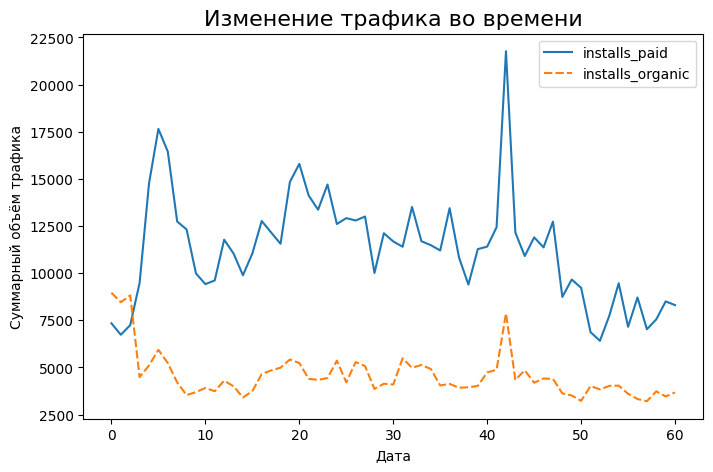

In [24]:
# Визуализируем данные
fig = plt.figure(figsize=(8, 5))
lineplot = sns.lineplot(data=result)
lineplot.set_title('Изменение трафика во времени', fontsize=16)
lineplot.set_xlabel('Дата')
lineplot.set_ylabel('Суммарный объём трафика')

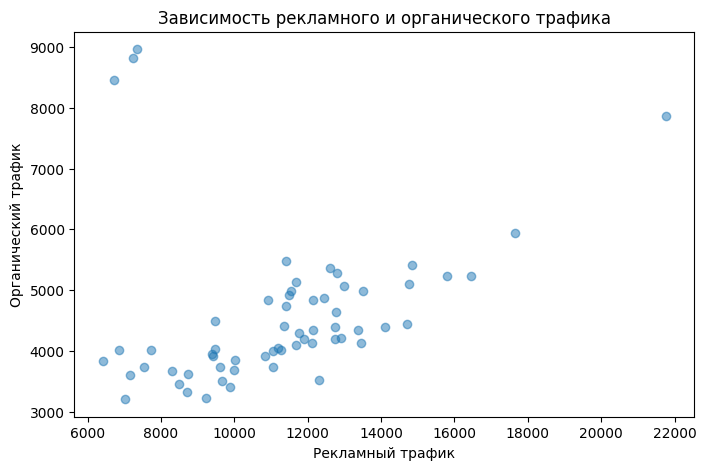

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(result['installs_paid'], result['installs_organic'], cmap='bwr', alpha=0.5)
plt.xlabel('Рекламный трафик')
plt.ylabel('Органический трафик')
plt.title('Зависимость рекламного и органического трафика')
plt.show()

In [26]:
# Найдем зависимость переменной 'installs_organic' от 'installs_paid'
model = smf.ols(formula='installs_organic ~ installs_paid' , data=result) 
results = model.fit()

# Анализ причинно-следственных связей:
causal_impact = results.summary()

display(causal_impact.tables[0])

Dep. Variable:,installs_organic,R-squared:,0.050
Model:,OLS,Adj. R-squared:,0.034
Method:,Least Squares,F-statistic:,3.114
Date:,"Fri, 05 Jul 2024",Prob (F-statistic):,0.0828
Time:,12:44:07,Log-Likelihood:,-518.65
No. Observations:,61,AIC:,1041.
Df Residuals:,59,BIC:,1046.
Df Model:,1,,
Covariance Type:,nonrobust,,


Метрика R-squared помогает понять, какую долю разнообразия (дисперсии) смогла уловить модель в данных. Позволяет сравнить, насколько модель лучше, чем простое предсказание средним, - в нашем случае, всего на 5%.  
Таким образом, R-squared = 0.05 - говорит о неудовлетворительном качестве построенной модели (чем ближе показатель к 1 тем лучше). Мы не можем утверждать, что выдвинутая гипотеза верна.
